In [90]:
import numpy as np
import matplotlib.pyplot as plt

def ParticleWithAirResistance( step, samples, gravitationalConstant, airResitance, mass,
                              initialHeight, angle, initialVelocity ):
    x = np.zeros( samples + 1 )
    y = np.zeros( samples + 1 )
    vx = np.zeros( samples + 1 )
    vy = np.zeros( samples + 1 )
    t = np.zeros( samples + 1 )
    y[ 0 ] = initialHeight
    vx[ 0 ] = initialVelocity * np.cos( angle )
    vy[ 0 ] = initialVelocity * np.sin( angle )
    for i in range( samples ):
        x[ i + 1 ] = x[ i ] + vx[ i ] * step
        vx[ i + 1 ] = vx[ i ] + ( - ( ( airResitance * vx[ i ] ) / mass ) ) * step
        y[ i + 1 ] = y[ i ] + vy[ i ] * step
        vy[ i + 1 ] = vy[ i ] + ( -gravitationalConstant - ( ( airResitance / mass ) * vy[ i ] ) ) * step
        t[ i + 1 ] = t[ i ] + step
    return t, x, y, vx, vy

def ParticleWithoutAirResistance( step, samples, gravitationalConstant, initialHeight, angle, initialVelocity ):
    x = np.zeros( samples + 1 )
    y = np.zeros( samples + 1 )
    vx = np.zeros( samples + 1 )
    vy = np.zeros( samples + 1 )
    t = np.zeros( samples + 1 )
    y[ 0 ] = initialHeight
    vx[ 0 ] = initialVelocity * np.cos( angle )
    vy[ 0 ] = initialVelocity * np.sin( angle )
    for i in range( samples ):
        vx[ i + 1 ] = vx[ i ] + vx[ 0 ] * step
        x[ i + 1 ] = x[ i ] + vx[ i ] * step
        vy[ i + 1 ] = vy[ i ] + ( - gravitationalConstant ) * step
        y[ i + 1 ] = y[ i ] + vy[ i ] * step
        t[ i + 1 ] = t[ i ] + step
    return t, x, y, vx, vy

def CreateDataSets( step, samples, gravitationalConstant, airResitance, mass,
                              initialHeight, angle, initialVelocity ):
    output = []
    output.append( ParticleWithoutAirResistance( step, samples, gravitationalConstant, initialHeight, angle, initialVelocity ) )
    output.append( ParticleWithAirResistance( step, samples, gravitationalConstant, 
                                             airResitance, mass, initialHeight, angle, initialVelocity ) )
    return output


def PlotData( step, samples, gravitationalConstant, airResitance, mass,
                              initialHeight, angle, initialVelocity ):
    output = CreateDataSets( step, samples, gravitationalConstant, airResitance, mass, initialHeight, angle, initialVelocity )
    plt.figure()
    plt.plot( output[ 0 ][ 1 ][ 0:45 ], output[ 0 ][ 2 ][ 0:45 ] )
    plt.plot( output[ 1 ][ 1 ][ 0:45 ], output[ 1 ][ 2 ][ 0:45 ] )
    plt.plot( range( 5 ), np.zeros( 5 ) )
    plt.show()


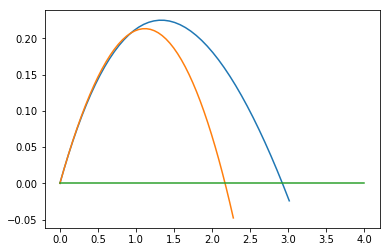

In [91]:
PlotData( .01, 1000, 9.8, 4, 10, 0, ( 20 * np.pi ) / 180.0, 6 )